# <span style="color: #4CAF50; font-family: 'Arial, sans-serif';">LP1 PROJECT - Team Silicon</span>
## <span style="color: #2196F3; font-family: 'Verdana, sans-serif';">AZUBI AFRICA PROJECT</span>

# INTRODUCTION
As data analyst, we will explore the Indian startup ecosystem by analyzing data spanning from 2018 to 2021. This project will adhere to the CRISP-DM framework, aiming to deliver meaningful insights to our client.

# Business Understanding:
1. Identify Key Trends:  
Objective: Uncover and understand the key trends in the Indian startup ecosystem over the four-year period (2018-2021).  
Goals: Identify sectors experiencing the most significant growth, the distribution of funding across rounds, and the geographic distribution of startup activities.
2. Evaluate Funding Patterns:  
Objective: Analyze funding patterns to understand how different sectors, rounds, and company activities attract investment.  
Goals: Identify sectors receiving the highest and lowest funding, explore the distribution of funding amounts, and understand the most common types of company activities that attract investment.
3. Assess Investor Involvement:  
Objective: Understand the role and impact of investors in the Indian startup ecosystem.  
Goals: Identify the most active investors, assess their investment patterns, and understand the correlation between investor involvement and 
startup success.

# Project Goals:
1. Clean and Prepare Data:  
Objective: Ensure the dataset is cleaned and prepared for analysis.  
Goals: Handle missing values, standardize data types, and address any inconsistencies or outliers.  
2. Perform Exploratory Data Analysis (EDA)  
Objective: Gain insights through exploratory analysis.  
Goals: Visualize trends over time, explore distributions of funding amounts, and identify notable patterns in the data.  
3. Communicate Findings:  
Objective: Effectively communicate insights and findings.  
Goals: Create clear and concise visualizations, reports, and presentations to convey key findings to stakeholders.
4. Provide Recommendations:  
Objective: Offer actionable recommendations based on the analysis.  
Goals: Suggest strategies for startups, investors, and policymakers based on identified trends and opportunities.

# HYPOTHESIS TESTING 
1. Null Hypothesis (HO) - The amount of funding for companies is not influenced by the company's industry.
2. Alternate Hypothesis (H1) - The amount of funding for companies is influenced by the company's industry.

# Business Questions
1. How does the distribution of funding amounts vary across different industries?
2. Are certain industries more consistent in funding amounts, indicating stability or predictability?
3. Can we identify specific industries that tend to attract higher funding amounts?
4. Are there outliers in the funding amounts within certain industries?
5. Does the location influence the funding in certain industries

--

# PROJECT WORK

In [181]:
# Importing the necessary libraries
import pyodbc     
#import the dotenv_values function from the dotenv package
from dotenv import dotenv_values    
import pandas as pd
from pandas_summary import DataFrameSummary
import warnings 
import re
import numpy as np

warnings.filterwarnings('ignore')

In [182]:
import re

In [183]:
from forex_python.converter import CurrencyRates

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("username")
password = environment_variables.get("password")

In [186]:
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [187]:
# Use the connect method of the pyodbc library and pass in the connection string.

connection = pyodbc.connect(connection_string)

In [188]:
# importing the data sets to the environment. The first two are SQL queries to pull the 2020 & 2021 data from the server
# The data3 & 4 are downloaded data sets thus importing them using pandas read_csv() for the 2018 & 2019 data sets

query1 = "SELECT * FROM dbo.LP1_startup_funding2021"
data1 = pd.read_sql(query1, connection)
query2 = "SELECT * FROM dbo.LP1_startup_funding2020"
data2 = pd.read_sql(query2, connection)

In [189]:
data1.to_csv('startup_funding2021.csv', index =False)
data2.to_csv('startup_funding2021.csv', index =False)

In [190]:
df_2018 = pd.read_csv('startup_funding2018.csv')
df_2019 = pd.read_csv('startup_funding2019.csv')
df_2020 = pd.read_csv('startup_funding2020.csv')
df_2021 = pd.read_csv('startup_funding2021.csv')

### Checking Data sets loaded on to notebook

In [191]:
df_2018.head(2)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...


In [192]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


The data frame from 2018 has the following attributes
1. All the 6 columns don't have any null values, and thus the data entries will need to be checked for consistency
2. There are 526 rows in the data frame
3. the amount column is in object format and needs to be cleaned into a numeric format
4. the column names should also be cleaned to become lower case and easy to read

In [193]:
# Renaming the columns and puting them in lowercase
new_column_names = {'Company Name': 'company_name', 'Industry': 'industry', 'Round/Series' : 'series',
                    'Amount': 'amount', 'Location': 'location', 'About Company': 'about'}
df_2018 = df_2018.rename(columns=new_column_names)

In [194]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  526 non-null    object
 1   industry      526 non-null    object
 2   series        526 non-null    object
 3   amount        526 non-null    object
 4   location      526 non-null    object
 5   about         526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [195]:
print(df_2018.columns)

Index(['company_name', 'industry', 'series', 'amount', 'location', 'about'], dtype='object')


In [196]:
# Checking for duplicates in the 2018 data
df_2018.duplicated().sum()

1

In [197]:
# droping the duplicates
df_2018.drop_duplicates(keep='first', inplace=True)

In [198]:
# Checking id the rows are down to 525 from 526
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  525 non-null    object
 1   industry      525 non-null    object
 2   series        525 non-null    object
 3   amount        525 non-null    object
 4   location      525 non-null    object
 5   about         525 non-null    object
dtypes: object(6)
memory usage: 28.7+ KB


#### Cleaning 2018 data column by column

In [199]:
# Cleaning company_name column
print(f"Number of unique companies in 'company_name' column: {df_2018['company_name'].nunique()}")

Number of unique companies in 'company_name' column: 525


##### Observation:
1.The comany name column appears to be clean as is as there are no duplicated company names with 525 unique companies

In [200]:
# Checking the Industry column
print(f"Number of unique companies in 'industry' column: {df_2018['industry'].nunique()}")

Number of unique companies in 'industry' column: 405


In [201]:
df_2018['industry'].value_counts()

industry
—                                                                                 30
Financial Services                                                                15
Education                                                                          8
Information Technology                                                             7
Finance, Financial Services                                                        5
                                                                                  ..
Business Intelligence, Customer Service, Market Research, SaaS                     1
Digital Media, Internet, Media and Entertainment, Online Portals, Social Media     1
Consumer Lending, Financial Services, Lending, Personal Finance                    1
Education, Information Technology, Internet, Mobile, Software                      1
Biotechnology, Health Care, Pharmaceutical                                         1
Name: count, Length: 405, dtype: int64

In [202]:
# To clean the industry column by removing the multiple entries and remaining with a common entry
industry_lists = df_2018['industry'].str.split(', ').explode()
# Get the most common industry for each original entry
most_common_industry = industry_lists.groupby(level=0).agg(lambda x: x.mode().iloc[0])
# Replace the 'industry' column with the most common industry for each entry
df_2018['industry'] = most_common_industry
# Check the result
print(f"Number of unique companies in cleaned 'industry' column: {df_2018['industry'].nunique()}")

Number of unique companies in cleaned 'industry' column: 147


In [203]:
# To remove the - in the industry column and covert to null
df_2018['industry'] = df_2018['industry'].replace('-', np.nan)

In [204]:
# To clean the series column 
# First checking for unique values
print(f"Unique values in the 'series' column:\n{df_2018['series'].nunique()}")

Unique values in the 'series' column:
21


In [205]:
df_2018['series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In the unique values, there appears to be a url link that need to be removed and replaced with the most common Venture - Series Unknown

In [206]:
# Define the value to replace the URL link
replacement_value = 'Venture - Series Unknown'
# Replace the URL link with the defined replacement value
df_2018['series'] = np.where(
    df_2018['series'].str.contains('http'),  # Check if the value contains 'http'
    replacement_value,
    df_2018['series']  # Keep the original value if it doesn't contain 'http'
)

In [207]:
# To check if the link has been dropped
df_2018['series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

In [208]:
# To clean the amount column
# First check the unique entries
df_2018['amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

Key observations:
1. Funding amounts are in Indian Rupees (₹), US Dollars ($), and potentially other currencies.
2. Numeric values are present in both integer and float formats.
3. Some entries include special characters like '—'.
4. A few entries seem to contain URL links or non-numeric data.
5. The data in this array may require cleaning and standardization to facilitate meaningful analysis of funding trends.

In [209]:
# Step 1: Manual conversion of Indian Rupees to USD with exchange rate 0.0146
conversion_rate_inr_to_usd = 0.0146

# Step 1: Convert entries with '₹' to dollars first, then to numeric
df_2018['amount'] = df_2018['amount'].apply(lambda x: float(x.replace('₹', '').replace(',', '')) * conversion_rate_inr_to_usd if isinstance(x, str) and '₹' in x else x)

# Step 2: Remove '$' from entries with a dollar sign and convert to numeric
df_2018['amount'] = df_2018['amount'].apply(lambda x: float(x.replace('$', '').replace(',', '')) if isinstance(x, str) and '$' in x else x)

# Step 3: Convert entries with no currency sign to numeric
df_2018['amount'] = pd.to_numeric(df_2018['amount'], errors='coerce')

# Step 4: Convert entries of "-" only to NaN
df_2018['amount'] = df_2018['amount'].replace('-', float('nan'))

# Display the updated DataFrame info
df_2018['amount'].head()

0     250000.0
1     584000.0
2     949000.0
3    2000000.0
4          NaN
Name: amount, dtype: float64

In [210]:
# Cleaning the location column
# Checking for unique values
df_2018['location'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

1. The 'location' column in the df_2018 DataFrame includes entries representing various cities and regions in India. Each entry follows a structure of City, State, Country. 
2. However, there are instances where the location entries are not consistent, with variations in city names and formatting.
3. For better analysis, it is important to split this column ito the three categories, City, State, Country

In [211]:
# Create new columns for city, state, and country
df_2018[['city', 'state', 'country']] = df_2018['location'].str.split(', ', expand=True)

In [212]:
# clean the about
# Check for unique values
print(f"Unique values in the 'series' column is: {df_2018['about'].nunique()}")

Unique values in the 'series' column is: 524


The about column will be left as is since the values are 524 unique values all object formats

In [213]:
# Checking data info for final cleaning
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  525 non-null    object 
 1   industry      525 non-null    object 
 2   series        525 non-null    object 
 3   amount        377 non-null    float64
 4   location      525 non-null    object 
 5   about         525 non-null    object 
 6   city          525 non-null    object 
 7   state         525 non-null    object 
 8   country       521 non-null    object 
dtypes: float64(1), object(8)
memory usage: 41.0+ KB


In [214]:
# Create final dataframe for 2018 data 
# 1. Drop 'amount', 'country', and 'location' columns
df_2018.drop(['country', 'location'], axis=1, inplace=True)
# 3. Add a separate column 'data_year' with 2018 as the only entry in datetime format
df_2018['data_year'] = pd.to_datetime('2018', format='%Y')
# Display the updated DataFrame info
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  525 non-null    object        
 1   industry      525 non-null    object        
 2   series        525 non-null    object        
 3   amount        377 non-null    float64       
 4   about         525 non-null    object        
 5   city          525 non-null    object        
 6   state         525 non-null    object        
 7   data_year     525 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 36.9+ KB


In [215]:
# displaying clean 2018 datframe
df_2018.head(5)

,company_name,industry,series,amount,about,city,state,data_year
0,TheCollegeFever,Brand Marketing,Seed,250000.0,"TheCollegeFever is a hub for fun, fiesta and f...",Bangalore,Karnataka,2018-01-01
1,Happy Cow Dairy,Agriculture,Seed,584000.0,A startup which aggregates milk from dairy far...,Mumbai,Maharashtra,2018-01-01
2,MyLoanCare,Credit,Series A,949000.0,Leading Online Loans Marketplace in India,Gurgaon,Haryana,2018-01-01
3,PayMe India,FinTech,Angel,2000000.0,PayMe India is an innovative FinTech organizat...,Noida,Uttar Pradesh,2018-01-01
4,Eunimart,E-Commerce Platforms,Seed,NaN,Eunimart is a one stop solution for merchants ...,Hyderabad,Andhra Pradesh,2018-01-01


## Performing EDA on clean 2018 dataframe

In [216]:
# 1. Summary Statistics
summary_stats = df_2018.describe(include="all")
summary_stats

,company_name,industry,series,amount,about,city,state,data_year
count,525,525,525,3.770000e+02,525,525,525,525
unique,525,147,20,NaN,524,50,18,NaN
top,TheCollegeFever,—,Seed,NaN,Algorithmic trading platform.,Bangalore,Karnataka,NaN
freq,1,30,279,NaN,2,101,166,NaN
mean,NaN,NaN,NaN,1.761677e+07,NaN,NaN,NaN,2018-01-01 00:00:00
min,NaN,NaN,NaN,8.760000e+02,NaN,NaN,NaN,2018-01-01 00:00:00
25%,NaN,NaN,NaN,5.000000e+05,NaN,NaN,NaN,2018-01-01 00:00:00
50%,NaN,NaN,NaN,1.300000e+06,NaN,NaN,NaN,2018-01-01 00:00:00
75%,NaN,NaN,NaN,5.000000e+06,NaN,NaN,NaN,2018-01-01 00:00:00
max,NaN,NaN,NaN,1.000000e+09,NaN,NaN,NaN,2018-01-01 00:00:00


Observations:
1. company_name:
All entries in the company_name column are unique, indicating no repetition.The top entry is "TheCollegeFever."
2. industry: The industry column has 30 occurrences of a missing or unspecified value represented by "—."The top industry is "Financial Services," appearing 30 times.
3. series: The most frequent funding series is "Seed," occurring 279 times. There are 20 unique funding series in the dataset.
4. amount: There are 377 non-null entries in the amount column.Funding amounts range from 876 to 1,000,000,000. The mean funding amount is approximately 17,616,770, while the standard deviation is 77,972,610.
5. about: There are 525 unique entries in the about column.The most frequent description is "Algorithmic trading platform," appearing twice.
6. city: There are 101 occurrences of "Bangalore" in the city column, making it the most frequent city. There are 50 unique cities in the dataset.
7. state: The most frequent state is "Karnataka," appearing 166 times.There are 18 unique states in the dataset.

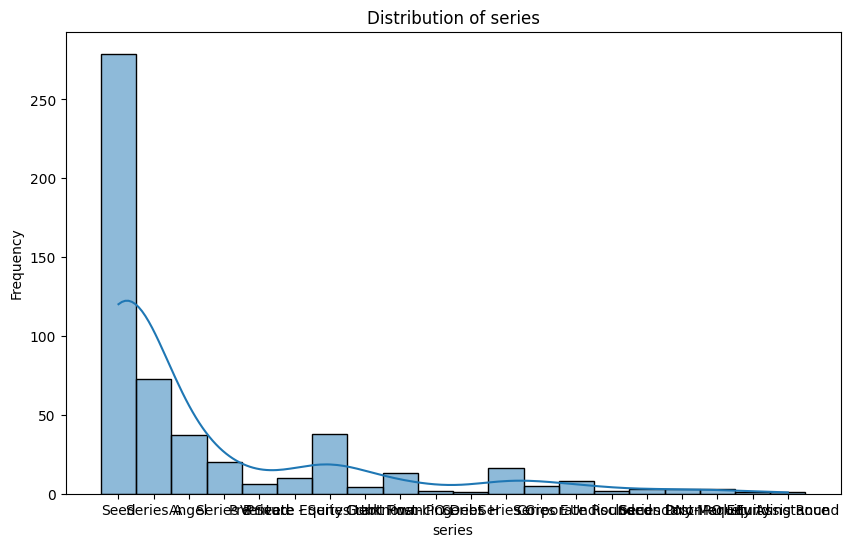

In [217]:
# 2. Distribution of series (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df_2018['series'], bins=10, kde=True)
plt.title('Distribution of series')
plt.xlabel('series')
plt.ylabel('Frequency')
plt.show()

In [218]:
# 3. Funding by Industry
industry_funding = df_2018.groupby('industry')['amount'].mean().sort_values(ascending=False)
industry_funding

industry
Insurance           3.715000e+08
Aerospace           2.920000e+08
Health Insurance    2.100000e+08
Food Delivery       1.739442e+08
Energy              1.163482e+08
                        ...     
Renewable Energy             NaN
Smart Cities                 NaN
Social Media                 NaN
Transportation               NaN
Wedding                      NaN
Name: amount, Length: 147, dtype: float64

In [219]:
# 4. Funding by Location
location_funding = df_2018.groupby(['city'])['amount'].mean().sort_values(ascending=False)
location_funding

city
Kalpakkam         2.100000e+08
Haryana           6.046217e+07
Bangalore         3.156973e+07
Guindy            3.000000e+07
Mumbai            2.631962e+07
Alleppey          2.200000e+07
Kormangala        1.709600e+07
Faridabad         1.460000e+07
Gurgaon           1.420715e+07
New Delhi         1.326269e+07
Jaipur            1.196986e+07
Chennai           8.195975e+06
Bengaluru         7.547112e+06
Delhi             5.514367e+06
Noida             4.267000e+06
Pune              2.499622e+06
Kolkata           2.464000e+06
Margão            1.496500e+06
Andheri           1.300000e+06
Indore            1.058400e+06
Bangalore City    1.001080e+06
Belgaum           8.760000e+05
Ahmedabad         8.522667e+05
India             6.205000e+05
Mylapore          6.000000e+05
Kanpur            5.840000e+05
Hyderabad         5.619491e+05
Bhopal            5.100000e+05
Thane             5.000000e+05
Uttar Pradesh     4.380000e+05
Coimbatore        2.500000e+05
Kalkaji           2.336000e+05
Gun

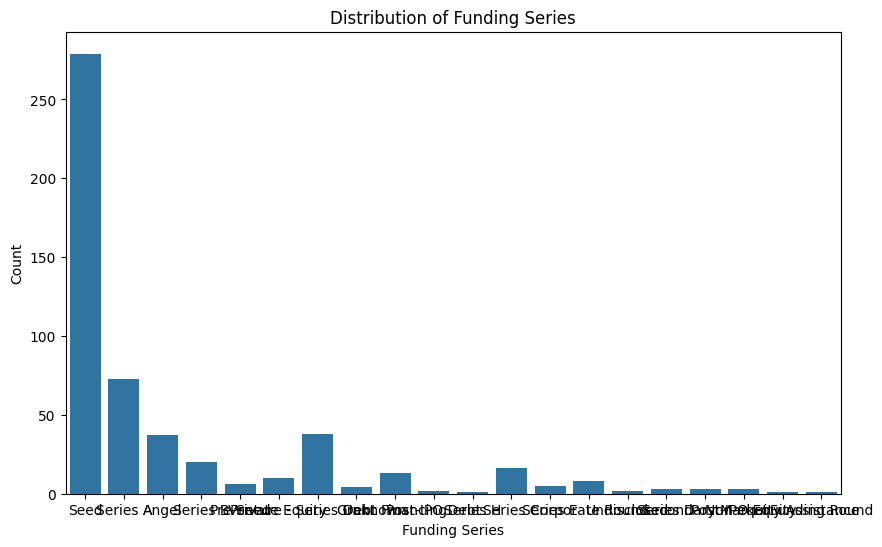

In [220]:
# 5. Series Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='series', data=df_2018)
plt.title('Distribution of Funding Series')
plt.xlabel('Funding Series')
plt.ylabel('Count')
plt.show()